In [7]:
%run ./model.ipynb

In [8]:
n = 6
a_s = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


############# Initialize ############
theta_start = 0
theta_end = np.pi/2
r_start = 3
r_end = 4

thetas = torch.linspace(theta_start,theta_end,steps=n_grid, dtype=torch.double)
rs = torch.linspace(r_start,r_end,steps=n_grid, dtype=torch.double)
f_free = torch.zeros((n_grid,4*n_grid-5), dtype=torch.double)
f_free[:,:n_grid-1] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:-1])
f_free[:,n_grid-1:2*(n_grid-1)] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:-1])
f_free[:,2*(n_grid-1):3*n_grid-4] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,1:-1])
f_free[:,3*n_grid-4:4*n_grid-5] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:-1])
f_free = f_free.reshape(-1,)
f_free = torch.nn.Parameter(f_free, requires_grad=True)

interp_mode = "bilinear"
align_corners = True
M = 1.0

############# Train ##############
for a in a_s:
    print("a={}".format(a))
    f_free, error, duration, losses = train(a, n, f_free)
    f_free = torch.nn.Parameter(f_free, requires_grad=True)
    torch.save(f_free.clone(), "./kerr_result/f_free_a_%.3f_n_%d_fix_n_sweep_a"%(a,n))
    np.save("./kerr_result/error_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n), error)
    np.save("./kerr_result/time_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n), duration)
    np.save("./kerr_result/losses_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n), error)

a=0.0
Epoch: 0 | Loss: 0.4259971752205497
Epoch: 100 | Loss: 0.0010220951537800549
Epoch: 200 | Loss: 0.000386381431285062
Epoch: 300 | Loss: 0.00023559945611537054
Epoch: 400 | Loss: 0.00017480753418804416
Epoch: 500 | Loss: 0.00011149080926617789
Epoch: 600 | Loss: 7.974568541872892e-05
Epoch: 700 | Loss: 7.727414620086964e-05
Epoch: 800 | Loss: 4.368148405515226e-05
Epoch: 900 | Loss: 0.0009706463485943603
Epoch: 1000 | Loss: 6.808741024383334e-05
Epoch: 1100 | Loss: 1.9355143280954128e-05
Epoch: 1200 | Loss: 2.009124764315332e-05
Epoch: 1300 | Loss: 1.3622711271797847e-05


KeyboardInterrupt: 

In [13]:
f_frees = []
times = []
errors = []
for a in a_s:
    f_free = torch.load("./kerr_result/f_free_a_%.3f_n_%d_fix_n_sweep_a"%(a,n))
    duration = np.load("./kerr_result/time_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n))
    error = np.load("./kerr_result/error_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n))
    np.load("./kerr_result/error_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n))
    f_frees.append(f_free)
    times.append(duration)
    errors.append(error)

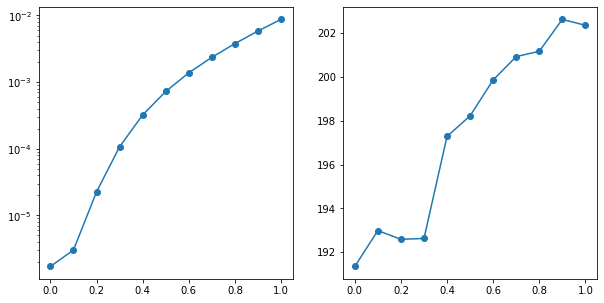

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(a_s, errors, marker="o")
plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(a_s, times, marker="o")